In [214]:
import pandas as pd

#Import BZ draft file, set column names, separate by tab
bzdraft = pd.read_csv("C:/Users/mcclo/OneDrive/Desktop/BZ Keeper Plot/2019bzdraftbyteam.txt", sep = '\t', names = ['Round', 'Pick', 'Name'])

#Discard team names by removing rows with NA values in Name column
bzdraft.dropna(subset=['Name'], inplace=True)

#Clean numerics in Round and Pick columns. There is probably a better way to do this
bzdraft['Round'] = bzdraft['Round'].str.replace(r'.', '')
bzdraft['Pick'] = bzdraft['Pick'].str.replace(r'(', '')
bzdraft['Pick'] = bzdraft['Pick'].str.replace(r')', '')

#Confirm data types for first 3 columns
bzdraft = bzdraft.astype({'Name': str, 'Round': int, 'Pick': int})

#Remove the old keeper symbol from names
bzdraft['Name'] = bzdraft['Name'].str.replace(r' ', '') 
    
#Reorder columns
bzdraft = bzdraft[['Name', 'Round', 'Pick']]
    

#Define function to tell if a number is even
def iseven(x):
###Determines if a number is even or odd###
    if int(x) % 2 == 0:
        return True
    else:
        return False
         
#Create empty list for new row to append data over        
keeperpick = []

#Populate keeperpick list using formulas for odd rounds and even round. 
#This is due to snake draft placement. 
#2nd overall pick in odd rounds, 13th overall pick in even.
for row in bzdraft['Round']:
    if iseven(int(row)) == False:
            keeperpick.append((int(row) - 1) * 14 + 2)
    else:
            keeperpick.append((int(row) - 1) * 14  + 13)

#Assign keeper pick list to a new column, and confirm data types
bzdraft['KeeperPick'] = keeperpick
bzdraft = bzdraft.astype({'KeeperPick': int})

#Sort bzdraft by pick number
bzdraft.sort_values(['Pick'], inplace = True)
bzdraft.reset_index(drop = True, inplace = True)

bzdraft.set_index('Name', inplace = True)

#To see complete DataFrame, remove #
#pd.set_option("display.max_rows", 192) 

print(bzdraft)


                     Round  Pick  KeeperPick
Name                                        
Saquon Barkley           1     1           2
Christian McCaffrey      1     2           2
DeAndre Hopkins          1     3           2
Ezekiel Elliott          1     4           2
Le'Veon Bell             1     5           2
...                    ...   ...         ...
Mason Crosby            16   188         223
Adam Humphries          16   189         223
Giorgio Tavecchio       16   190         223
Philadelphia            16   191         223
Phillip Lindsay         16   192         223

[192 rows x 3 columns]


In [215]:
import pandas as pd

#Import the ADP file, separated by commas, using the header as column names 
adp = pd.read_csv("C:/Users/mcclo/OneDrive/Desktop/BZ Keeper Plot/2020adp.txt", sep = ',', header = 0)

#Isolate the 4 relevant columns in this DataFrame
adp = adp.loc[:, ['Name', 'Overall']]

#Remove word Defense from defense names
adp['Name'] = adp['Name'].str.replace(r' Defense', '') 

#Clean names to match other dataframes
adp['Name'] = adp['Name'].str.replace(r'Pat ', 'Patrick ')
adp['Name'] = adp['Name'].str.replace(r'LeVeon ', 'Le\'Veon ')
adp['Name'] = adp['Name'].str.replace(r'Jr', 'Jr.')

adp.set_index('Name', inplace = True)

print(adp)

                     Overall
Name                        
Christian McCaffrey      1.3
Saquon Barkley           2.2
Ezekiel Elliott          2.8
Alvin Kamara             4.5
Michael Thomas           5.1
...                      ...
Brandon McManus        145.0
Matt Prater            145.4
New Orleans            145.5
Kaimi Fairbairn        146.1
Jake Elliott           147.0

[185 rows x 1 columns]


In [216]:
import pandas as pd

#Import the ADP file, separated by commas, using the header as column names 
rankings = pd.read_csv("C:/Users/mcclo/OneDrive/Desktop/BZ Keeper Plot/2019rankings.csv", sep = ',', header = 0, keep_default_na = False)

#Isolate the 4 relevant columns in this DataFrame
rankings = rankings.loc[:, ['Player', 'Team', 'Position', 'Points', 'Avg']]

#Rename Player column to Name
rankings.rename(columns={"Player": "Name"}, inplace  = True)

#Remove team name from defenses
rankings.loc[rankings['Position'] == 'DST', ['Name']] = rankings.Name.str.rsplit(' ',1).str[0]

rankings.set_index('Name', inplace = True)

print(rankings)

                    Team Position Points   Avg
Name                                          
Lamar Jackson        BAL       QB  421.7  28.1
Christian McCaffrey  CAR       RB  413.2  25.8
Deshaun Watson       HOU       QB  332.5  22.2
Dak Prescott         DAL       QB  348.9  21.8
Matthew Stafford     DET       QB  171.5  21.4
...                  ...      ...    ...   ...
Greg Dortch           FA       WR   -2.0  -1.0
Corey Clement        PHI       RB   -4.0  -1.0
Quincy Enunwa         FA       WR   -1.9  -1.9
                                              
                                              

[805 rows x 4 columns]


In [204]:
import pandas as pd

#Import the 2020 keeper file, separated by tab, using the header as column names 
iskept = pd.read_csv("C:/Users/mcclo/OneDrive/Desktop/BZ Keeper Plot/Keepers2020.txt", sep = '\t', header = 0)

print(iskept)


                   Name IsKept
0   JuJu Smith-Schuster    Yes
1         Davante Adams    Yes
2       Patrick Mahomes    Yes
3         Lamar Jackson    Yes
4          Kenyan Drake    Yes
..                  ...    ...
30          James White    Yes
31         Allen Lazard    Yes
32           A.J. Brown    Yes
33       Kenny Golladay    Yes
34       Raheem Mostert    Yes

[35 rows x 2 columns]


In [206]:
#combine rankings and adp DataFrames
combined = pd.merge(rankings, adp, how = 'left', on = 'Name')

#Remove any player without an 'overall' ranking from adp. 
#These are typically undrafted players and will not be good keepers.
combined.dropna(subset=['Overall'], inplace=True)

#combine combined and bzdraft dataframes
combined = pd.merge(combined, bzdraft, how = 'left', on = 'Name')

#combine combined and iskept dataframes
combined = pd.merge(combined, iskept, how = 'left', on = 'Name')

#fill all players that are not keepers to have 'No' for IsKept
combined['IsKept'] = combined['IsKept'].fillna('No')

#Fill missing data for undrafted players. 16th round and 223rd pick.
combined['Round'] = combined['Round'].fillna(16)
#combined['Pick'] = combined['Pick'].fillna(223)
combined['KeeperPick'] = combined['KeeperPick'].fillna(223)

#Remove 'Pick' column, not needed anymore
combined.drop('Pick', axis = 1, inplace = True)

combined.drop(combined[combined.IsKept == 'Yes'].index, inplace=True)


combined = combined.astype({'Team': str, 'Position': str, 'Points': float, 'Avg': float, 'Overall': float, 'Round': float, 'KeeperPick': float})

#separate data for each position
qbdata = combined.loc[combined['Position'] == 'QB']
rbdata = combined.loc[combined['Position'] == 'RB']
wrdata = combined.loc[combined['Position'] == 'WR']
tedata = combined.loc[combined['Position'] == 'TE']
dstdata = combined.loc[combined['Position'] == 'DST']
kdata = combined.loc[combined['Position'] == 'K']

print(combined)


                    Name Team Position  Points   Avg  Overall  Round  \
1    Christian McCaffrey  CAR       RB   413.2  25.8      1.3    1.0   
3           Dak Prescott  DAL       QB   348.9  21.8     44.2   16.0   
4       Matthew Stafford  DET       QB   171.5  21.4    107.7   16.0   
6         Russell Wilson  SEA       QB   333.5  20.8     57.1    8.0   
7             Drew Brees   NO       QB   228.8  20.8     91.1    6.0   
..                   ...  ...      ...     ...   ...      ...    ...   
163         Hayden Hurst  ATL       TE    61.9   3.9    101.5   16.0   
164       Justin Jackson  LAC       RB    26.7   3.8    137.6    9.0   
165    Darrell Henderson  LAR       RB    20.4   1.6     92.0   16.0   
166       Rob Gronkowski   TB       TE     0.0   0.0    108.9   16.0   
167           A.J. Green  CIN       WR     0.0   0.0     61.7    3.0   

     KeeperPick IsKept  
1           2.0     No  
3         223.0     No  
4         223.0     No  
6         111.0     No  
7         

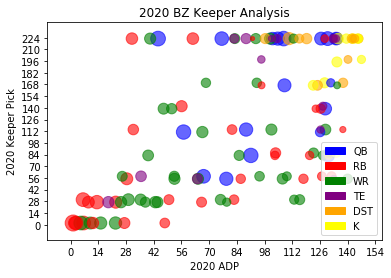

In [207]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Customize labels, title, ticks
plt.xlabel('2020 ADP')
plt.ylabel('2020 Keeper Pick')
plt.title('2020 BZ Keeper Analysis')
plt.xticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])
plt.yticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])

#specify colors for bubbles for each position
colors = {
    'QB': 'blue',
    'RB': 'red',
    'WR': 'green',
    'TE': 'purple',
    'DST': 'orange',
    'K': 'yellow'
}

#create legend categories. Definitely long-winded. Need to find a way to automate
QB = mpatches.Patch(color='blue', label='QB')
RB = mpatches.Patch(color='red', label='RB')
WR = mpatches.Patch(color='green', label='WR')
TE = mpatches.Patch(color='purple', label='TE')
DST = mpatches.Patch(color='orange', label='DST')
K = mpatches.Patch(color='yellow', label='K')

#create legend, locate in lower right (least desirable keepers)
plt.legend(handles=[QB, RB, WR, TE, DST, K], loc='lower right')

#Create scatterplot. Bubbles are sized based on 2020 scoring average times 10.
plt.scatter(combined.Overall, combined.KeeperPick, s = combined.Avg*10, c= [colors[pos] for pos in combined['Position']], alpha = 0.6)

plt.show()


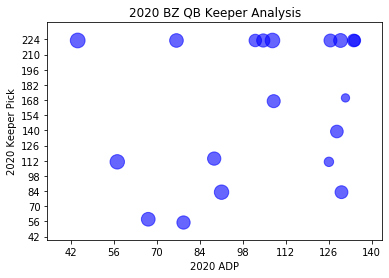

In [208]:
import matplotlib.pyplot as plt

#Customize labels, title, ticks
plt.xlabel('2020 ADP')
plt.ylabel('2020 Keeper Pick')
plt.title('2020 BZ QB Keeper Analysis')
plt.xticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])
plt.yticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])

#Create scatterplot. Bubbles are sized based on 2020 scoring average times 10.
plt.scatter(qbdata.Overall, qbdata.KeeperPick, s = qbdata.Avg*10, c= 'blue', alpha = 0.6)

plt.show()


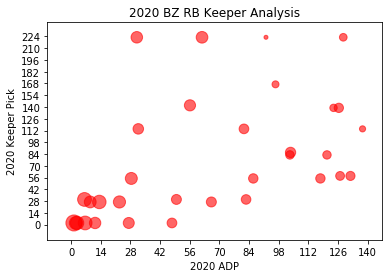

In [209]:
import matplotlib.pyplot as plt

#Customize labels, title, ticks
plt.xlabel('2020 ADP')
plt.ylabel('2020 Keeper Pick')
plt.title('2020 BZ RB Keeper Analysis')
plt.xticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])
plt.yticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])

#Create scatterplot. Bubbles are sized based on 2020 scoring average times 10.
plt.scatter(rbdata.Overall, rbdata.KeeperPick, s = rbdata.Avg*10, c= 'red', alpha = 0.6)

plt.show()


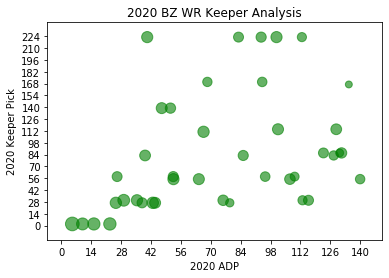

In [210]:
import matplotlib.pyplot as plt

#Customize labels, title, ticks
plt.xlabel('2020 ADP')
plt.ylabel('2020 Keeper Pick')
plt.title('2020 BZ WR Keeper Analysis')
plt.xticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])
plt.yticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])

#Create scatterplot. Bubbles are sized based on 2020 scoring average times 10.
plt.scatter(wrdata.Overall, wrdata.KeeperPick, s = wrdata.Avg*10, c= 'green', alpha = 0.6)

plt.show()


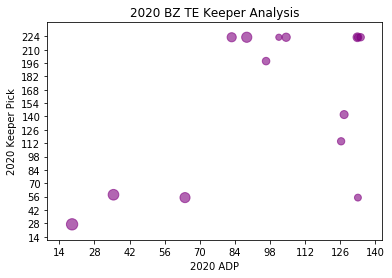

In [211]:
import matplotlib.pyplot as plt

#Customize labels, title, ticks
plt.xlabel('2020 ADP')
plt.ylabel('2020 Keeper Pick')
plt.title('2020 BZ TE Keeper Analysis')
plt.xticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])
plt.yticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])

#Create scatterplot. Bubbles are sized based on 2020 scoring average times 10.
plt.scatter(tedata.Overall, tedata.KeeperPick, s = tedata.Avg*10, c= 'purple', alpha = 0.6)

plt.show()


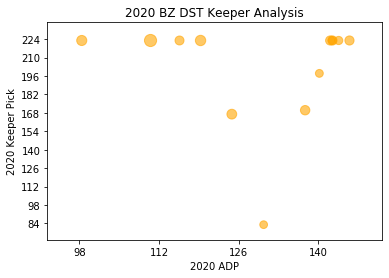

In [212]:
import matplotlib.pyplot as plt

#Customize labels, title, ticks
plt.xlabel('2020 ADP')
plt.ylabel('2020 Keeper Pick')
plt.title('2020 BZ DST Keeper Analysis')
plt.xticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])
plt.yticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])

#Create scatterplot. Bubbles are sized based on 2020 scoring average times 10.
plt.scatter(dstdata.Overall, dstdata.KeeperPick, s = dstdata.Avg*10, c= 'orange', alpha = 0.6)

plt.show()


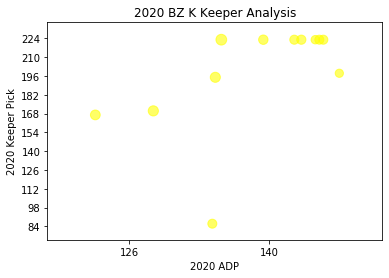

In [213]:
import matplotlib.pyplot as plt

#Customize labels, title, ticks
plt.xlabel('2020 ADP')
plt.ylabel('2020 Keeper Pick')
plt.title('2020 BZ K Keeper Analysis')
plt.xticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])
plt.yticks([0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224])

#Create scatterplot. Bubbles are sized based on 2020 scoring average times 10.
plt.scatter(kdata.Overall, kdata.KeeperPick, s = kdata.Avg*10, c= 'yellow', alpha = 0.6)

plt.show()
